In [1]:
import pandas as pd 
import pyarrow.parquet as pq

In [10]:
df = pq.read_table('../dataClau/modelo.parquet').to_pandas()
df.head(5)

,precio,acceso_anticipado,metascore,año,categoria_n,sentimiento_n
1465,9.99,0,96,1998,11,1
1648,6.99,0,84,2006,290,4
1687,6.99,0,80,2006,290,1
1711,9.99,0,76,2006,11,1
1791,9.99,0,76,2006,144,1


In [8]:
df1 = pq.read_table('../dataClau/categoria_modelo.parquet').to_pandas()
df1.head()

,categoria,categoria_n
1465,action,11
1648,strategy,290
1791,indie,144
1871,rpg,249
2423,simulation,266


In [7]:
df2 = pq.read_table('../dataClau/sentimiento_modelo.parquet').to_pandas()
df2.head()

,sentimiento,sentimiento_n
1465,muy positivo,1
1648,positivo,4
2188,neutro,3
3504,negativo,2
27365,muy negativo,0


In [2]:
df_steam_games = pd.read_csv('../data/steam_games.csv')
#df_steam_games.tail()

C:\Users\EduarC\AppData\Local\Temp\ipykernel_12976\528647.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_steam_games = pd.read_csv('../data/steam_games.csv')


In [3]:
df_steam_games_limpio = pd.read_csv('../data/df_steam_games_limpio.csv')

In [5]:
df_steam_games_limpio.to_parquet('../data/df_steam_games_limpio_compr.parquet')

In [3]:
df_steam_games = pq.read_table('../data/steam_games_compr.parquet').to_pandas()

In [4]:
df_steam_games.shape

(120445, 13)

In [5]:
''' Ahora, eliminemos las filas del dataframe que poseen nulos en todas
las entradas'''
df_steam_games = df_steam_games.dropna(how='all')

In [6]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  object 
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(1), object(12)
memory usage: 3.4+ MB


In [7]:
df_steam_games.isnull().sum()

publisher       8071
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [8]:
df_steam_games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL


In [9]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['genres'] = df_steam_games['genres'].str.split(', ')
df_steam_games = df_steam_games.explode('genres')
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace("'", ""))


In [10]:
# Cantidad diferentes de generos
df_steam_games['genres'].nunique()

23

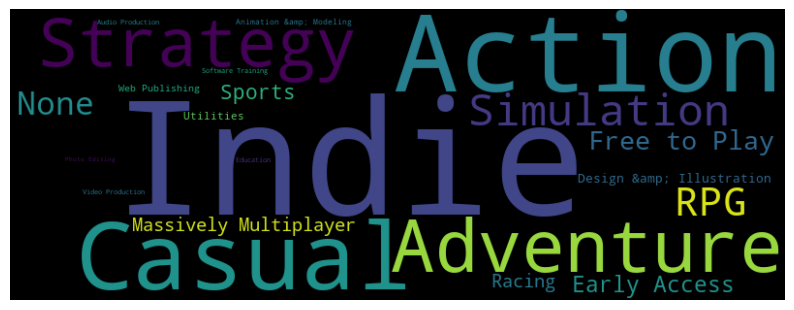

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['genres'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['tags'] = df_steam_games['tags'].str.split(', ')
df_steam_games = df_steam_games.explode('tags')
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace("'", ""))

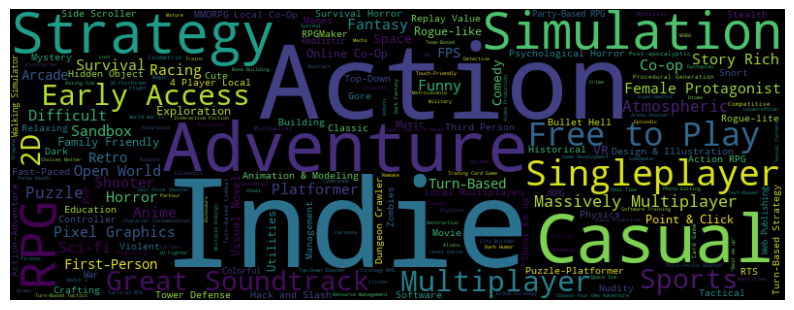

In [13]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['tags'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['specs'] = df_steam_games['specs'].str.split(', ')
df_steam_games = df_steam_games.explode('specs')
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace("'", ""))

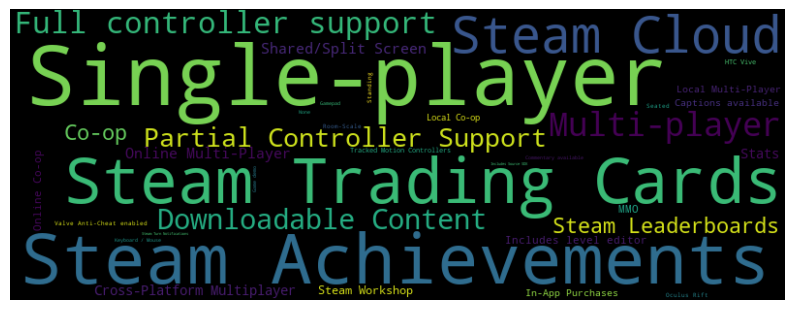

In [15]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['specs'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df_steam_games['anio'] = df_steam_games['release_date'].str.extract(r'(\d{4})')

In [17]:
df_steam_games[df_steam_games['anio'] > '2030'].head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,anio
101738,一次元创作组,Casual,Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,Early Access,http://steamcommunity.com/app/710190/reviews/?...,Single-player,None,True,710190.0,一次元创作组,5275
101738,一次元创作组,Casual,Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,Early Access,http://steamcommunity.com/app/710190/reviews/?...,Steam Achievements,None,True,710190.0,一次元创作组,5275
101738,一次元创作组,Casual,Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,Early Access,http://steamcommunity.com/app/710190/reviews/?...,Steam Trading Cards,None,True,710190.0,一次元创作组,5275
101738,一次元创作组,Casual,Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,Early Access,http://steamcommunity.com/app/710190/reviews/?...,Steam Workshop,None,True,710190.0,一次元创作组,5275
101738,一次元创作组,Casual,Puzzle Sisters Foer,Puzzle Sisters Foer,http://store.steampowered.com/app/710190/Puzzl...,预热群52756441,Early Access,http://steamcommunity.com/app/710190/reviews/?...,Steam Cloud,None,True,710190.0,一次元创作组,5275


In [18]:
df_steam_games['anio'][df_steam_games['anio'] == '5275'] = '2018'

C:\Users\EduarC\AppData\Local\Temp\ipykernel_3908\801541879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['anio'][df_steam_games['anio'] == '5275'] = '2018'


In [19]:
fecha = df_steam_games['release_date']
df_steam_games.drop('release_date', axis=1, inplace=True)

In [20]:
df_steam_games.reset_index(drop=True, inplace=True)
df_steam_games.tail(2)

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio
2088824,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,VR,http://steamcommunity.com/app/681550/reviews/?...,Standing,4.99,True,681550.0,None,NaN
2088825,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,VR,http://steamcommunity.com/app/681550/reviews/?...,Room-Scale,4.99,True,681550.0,None,NaN


<Axes: xlabel='anio'>

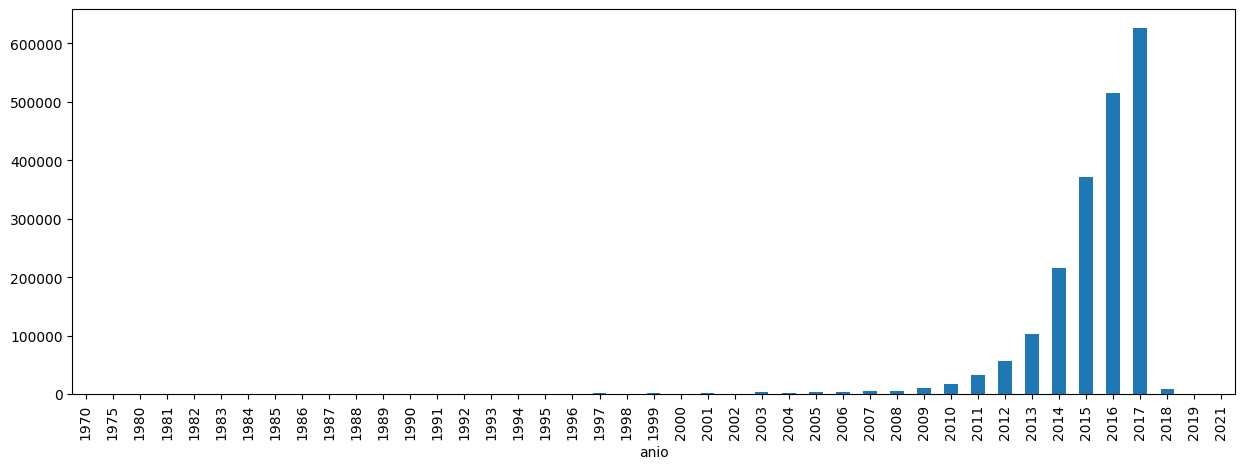

In [21]:
df_steam_games['anio'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

In [22]:
df_steam_games.head(3)

# Falta verificar el id (punto?)

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Strategy,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
1,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Action,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018
2,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Indie,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140.0,Kotoshiro,2018


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_steam_games['anio'].value_counts()

In [28]:
df_steam_games[df_steam_games['id']=='222000.0']

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,anio


In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_steam_games['id'].value_counts()

id
344890.0     1980
346330.0     1700
302670.0     1680
254200.0     1560
372800.0     1440
244770.0     1400
204360.0     1400
451600.0     1360
308080.0     1320
708940.0     1320
269210.0     1300
512900.0     1300
238460.0     1280
351100.0     1260
327090.0     1260
207140.0     1200
113020.0     1200
579840.0     1200
300380.0     1200
368180.0     1190
257750.0     1120
249990.0     1120
333340.0     1120
487000.0     1100
473850.0     1100
508150.0     1100
304930.0     1100
691630.0     1100
512540.0     1100
602080.0     1100
394690.0     1080
553290.0     1080
326460.0     1080
487330.0     1045
104900.0     1040
291860.0     1000
244930.0     1000
306460.0     1000
206500.0     1000
346110.0     1000
389510.0      960
362890.0      960
99900.0       960
204300.0      960
446270.0      960
768950.0      960
488440.0      960
246620.0      960
462440.0      952
527230.0      950
622370.0      936
703950.0      931
237870.0      900
645460.0      900
395180.0      900
211820.

In [29]:
df_steam_games['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2088826 entries, 0 to 2088825
Series name: id
Non-Null Count    Dtype  
--------------    -----  
2088625 non-null  float64
dtypes: float64(1)
memory usage: 15.9 MB


#### verificar ids

In [30]:
df_reviews = pd.read_csv('../data/dfreviewsOpen.csv')
df_reviews.to_parquet('../data/dfreviewsOpen_compr.parquet')
df_reviews = pq.read_table('../data/dfreviewsOpen_compr.parquet').to_pandas()
df_reviews = df_reviews.dropna(how='all')
df_reviews = df_reviews.drop(['0'], axis=1)

In [32]:
import pandas as pd

# Carga tus DataFrames o crea los DataFrames df1 y df2
# df1 = ...
# df2 = ...

# Utiliza el método merge para encontrar elementos similares
result = df_steam_games.merge(df_reviews, left_on='id', right_on='item_id', how='inner')

# result ahora contiene filas que tienen elementos coincidentes en ambas columnas
# Puedes acceder a estos elementos a través de result

# Si solo deseas una lista de elementos únicos similares, puedes hacer lo siguiente:
#elementos_similares = result['Columna1'].unique()

# Otra opción es convertir la columna en una lista de Python
#elementos_similares = result['Columna1'].tolist()

# Si deseas ver todo el DataFrame resultante con las filas coincidentes, puedes hacerlo:
#print(result)

In [33]:
result